In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
import itertools
import torch
import random
import time
import os
import gym
import tqdm

# import Koopman Libraries
from core.koopman_core_linear import KoopDNN_linear, KoopmanNet_linear, KoopmanNetCtrl_linear
from sklearn import preprocessing
from core.util import fit_standardizer
from models.koop_model import model_matricies,lift

# drone_dynamics
from dynamics.quadsim_2d import QuadSim

In [2]:
quad_params = {}
quad_params['m'] = 2
quad_params["g"] = 9.81
quad_params["L"] = 0.2
quad_params['Ixx'] = 1 #0.02

In [3]:
env = QuadSim(quad_params)
traj_length = 1000
####generate data
num_states = 6
num_inputs = 2
x_ref = np.empty((num_states, traj_length+1)) # cartesian state matrix

obs = env.reset(traj = 'star')
done = False
    
for j in range(traj_length):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    if j == 0:
        x_ref[:,j] = env.Quadrotor.get_state()   
    x_ref[:,j+1] = env.Quadrotor.get_state() 
env.close()

# x_ref = np.load('quad_path.npy')

8.059941316630987


/home/rajpal/.local/lib/python3.8/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


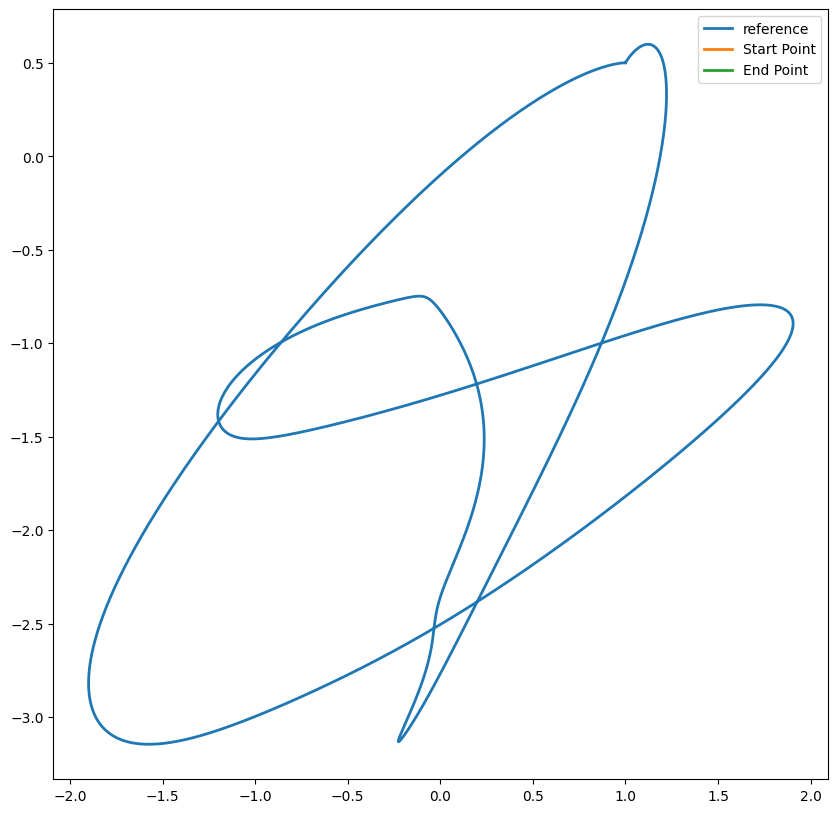

In [4]:
plt.figure(figsize=(10, 10) )
plt.plot(x_ref[0,:], x_ref[1,:], label='reference',linewidth = 2.0)
plt.plot(x_ref[0,0], x_ref[1,0], label='Start Point',linewidth = 2.0)
plt.plot(x_ref[0,-1], x_ref[1,-1], label='End Point',linewidth = 2.0)
plt.legend()